In [14]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mount your drive first. The root should be drive/, then modify the path to the dataset. To find where it is, on the sidebar, click on content/drive/MyDrive thats your root.

In [4]:
import pandas as pd
drive_root = "data/processed/"
filename = "groceries.csv"
data = pd.read_csv(drive_root+filename)
data

,Unnamed: 0,Member_number,Date,itemDescription
0,0,1000,15-03-2015,"['sausage', 'whole milk', 'semi-finished bread..."
1,1,1000,24-06-2014,"['whole milk', 'pastry', 'salty snack']"
2,2,1000,24-07-2015,"['canned beer', 'misc. beverages']"
3,3,1000,25-11-2015,"['sausage', 'hygiene articles']"
4,4,1000,27-05-2015,"['soda', 'pickled vegetables']"
...,...,...,...,...
14958,14958,4999,24-01-2015,"['tropical fruit', 'berries', 'other vegetable..."
14959,14959,4999,26-12-2015,"['bottled water', 'herbs']"
14960,14960,5000,09-03-2014,"['fruit/vegetable juice', 'onions']"
14961,14961,5000,10-02-2015,"['soda', 'root vegetables', 'semi-finished bre..."


# New Section

In [28]:
import ast

# Convert the string to a list of lists
dataset = [ast.literal_eval(string) for string in data["movieId"]]
dataset[:10]
all_items = [item for sublist in dataset for item in sublist]

# Count the number of unique items
num_unique = len(set(all_items))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


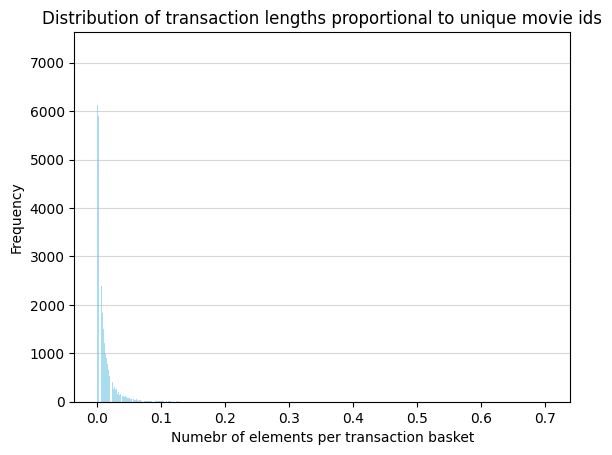

In [29]:
import matplotlib.pyplot as plt
# Calculate the lengths of elements in the column
lengths = data['movieId'].apply(len) / num_unique

# Plotting the histogram of lengths
plt.hist(lengths, bins='auto', color='skyblue', alpha=0.7, rwidth=0.85)
plt.xlabel('Numebr of elements per transaction basket')
plt.ylabel('Frequency')
plt.title('Distribution of transaction lengths proportional to unique movie ids')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [3]:
import pandas as pd
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

### alternatively:
min_supports = [0.01, 0.05, 0.1, 0.2]
frequent_itemsets_list = {}
for ms in min_supports:
    start_time = time.time()
    # apdf = apriori(df, min_support=ms, use_colnames=True)
    apdf = fpgrowth(df, min_support=ms, use_colnames=True)
    apdf["itemsets"] = apdf["itemsets"].apply(lambda x: list(x))
    frequent_itemsets_list[ms] = {
        'frequent_itemsets': apdf,
        'execution_time': time.time() - start_time
    }
frequent_itemsets_list

{0.01: {'frequent_itemsets':         support      itemsets
  0      0.164986        [1196]
  1      0.153775        [1198]
  2      0.144315        [4993]
  3      0.125747        [5952]
  4      0.123762        [7153]
  ...         ...           ...
  62134  0.010493   [2355, 318]
  62135  0.010368  [2355, 1198]
  62136  0.011204  [2355, 2571]
  62137  0.010361  [1201, 2951]
  62138  0.011314   [858, 3362]
  
  [62139 rows x 2 columns],
  'execution_time': 328.4773259162903},
 0.05: {'frequent_itemsets':       support     itemsets
  0    0.164986       [1196]
  1    0.153775       [1198]
  2    0.144315       [4993]
  3    0.125747       [5952]
  4    0.123762       [7153]
  ..        ...          ...
  270  0.057411   [608, 593]
  271  0.056649   [608, 858]
  272  0.056942  [1193, 858]
  273  0.055022  [1193, 318]
  274  0.054502  [296, 1193]
  
  [275 rows x 2 columns],
  'execution_time': 25.707088947296143},
 0.1: {'frequent_itemsets':      support      itemsets
  0   0.164986    

In [24]:
frequent_itemsets_list[0.01]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.015185,[1004836]
1,0.041513,[1004767]
2,0.055393,[1004856]
3,0.024026,[1004833]
4,0.015139,[5100816]
5,0.010751,[1004741]
6,0.019535,[1002544]
7,0.021120,[1004870]
8,0.015954,[1004249]
9,0.024061,[1005115]


In [19]:
from mlxtend.frequent_patterns import association_rules
ar_list = {}
for key, frequent_itemsets in frequent_itemsets_list.items():
    if frequent_itemsets.empty:
        ar_list[key] = pd.DataFrame()
        continue
    ar_list[key] = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i,fi in frequent_itemsets_list.items():
    drive_root
    fname = filename.split(".")[0]
    ar_list[i].to_csv(f"{drive_root}association_rules/{fname}_assoc_rules_{i}")
    fi.to_csv(f"{drive_root}freq_itemsets/{fname}_freqitemsets_{i}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
